In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

<!-- <img src="./figs/best_random_32.gif" alt="Best of Random Searches (32 Cities" style="width: 600px;"/> -->

In [119]:
# N = 100
# ./figs/best_random_32.gif

# for i in range(N):
#     plot_tsp(best_paths, i, x, y)
#     plt.text(12, 12, str(i+1), fontsize="large")
#     plt.title("Best of Random Search with 32 Cities")
#     filename = "./figs/path_" + str(i) + ".png"
#     plt.savefig(filename, dpi=200)
#     plt.close()

In [2]:
# funcs 

def draw_path(p1, p2, ax):
    point1 = [1, 2]
    point2 = [3, 4]

    x_values = [p1[0], p2[0]]
    y_values = [p1[1], p2[1]]
    ax.plot(x_values, y_values, color="#343f56")
    
def plot_path(path, x, y, radius, ax=None):
    
    if ax is None:
        ax = plt.gca()   
            
    # circle
    circle = plt.Circle((0, 0), radius) 
    circle.set_fill(False)
    ax.add_patch(circle)
    
    # cities
    ax.scatter(x,y)
    ax.scatter(x[0],y[0], color="#fb9300")
    
    for i in range(np.size(x)-1):
        if (x[i]>0): 
            dx = radius*0.1
        if (x[i]<0): 
            dx = -radius*0.1
        if (y[i]>0): 
            dy = radius*0.2
        if (y[i]<0): 
            dy = -radius*0.2
        
        ax.text(x[i]+dx, y[i]+dy, str(i), color='r')
        
    # Grid and limits
    ax.grid(True)
    lim = radius*1.5
    ax.set_xlim([-lim,lim])
    ax.set_ylim([-lim,lim])

    # plot given path
    N = np.size(path)
    for i in range(N):
        if (i==N-1):
            a = int(path[i])
            b = int(path[0])
        else:
            a = int(path[i])
            b = int(path[i+1])
        p1 = [x[a], y[a]]
        p2 = [x[b], y[b]]
        draw_path(p1, p2, ax)
    
    return ax

def check_cost(path, x, y):
    path = path.astype(int)
    path = np.append(path, 0)
    sum = 0
    print(path ,"\n")
    for i in range(np.size(path)-1):
        a = path[i]
        b = path[i+1]
        sum += abs((x[a]- x[b])+(y[a]-y[b]))
    return sum

In [5]:
# Data

datafile = "./cities.dat"
x, y = np.loadtxt(datafile, usecols=(0, 1), unpack=True)

datafile = "./best_path.dat"
best_paths = np.loadtxt(datafile)

datafile = "./avg_cost.dat"
gen, avg_cost = np.loadtxt(datafile, usecols=(0,1), unpack=True)

datafile = "./least_cost.dat"
least_cost = np.loadtxt(datafile)

[ 0  1  7 23 14 20 22 18 13 29 28 16  3  9 10 11 30 12  4 26 25 27 24 21
  2 17 31  8  5 15 19  6  0] 

Cost of path 100 :  59.03
Cost according to sim :  59.026048


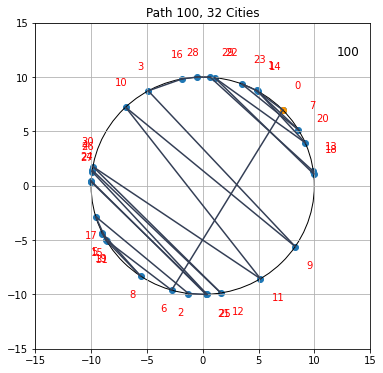

In [8]:
# Plot

n = 99
radius = 10
n_cities = np.size(x)-1
fig, ax = plt.subplots(figsize=(6,6))
ax = plot_path(best_paths[n], x, y, radius, ax)
# ax = plot_path(thebest, x, y, ax)

ax.title.set_text("Path " + str(n+1) +  ", " + str(n_cities)+" Cities")
ax.text(radius*1.2, radius*1.2, str(n+1), fontsize="large")

check_path = best_paths[n]

print("Cost of path " + str(n+1) + " : ", round(check_cost(check_path, x, y), 2) )
print("Cost according to sim : ", least_cost[n])
plt.show()

# [ 0 20  7 14  1 23 29 22 13 18 28 16  3 9 10 11 12 30  4 26 21 24 25 27 2  6 15  5  8 19 31 17  0] 

[0 1 3 4 5 6 2 0] 

[0 2 5 6 4 3 1 0] 



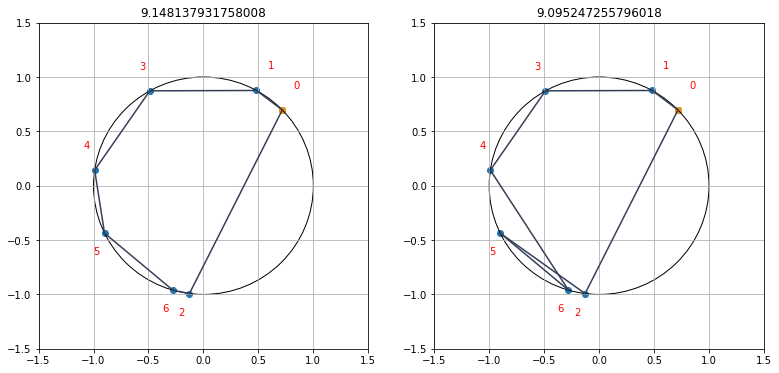

In [342]:
# Compare
fig, ax = plt.subplots(1, 2, figsize=(13,6))

thebest = np.array([0,1,3,4,5,6,2])
ax[0] = plot_path(thebest, x, y, radius, ax[0])
ax[0].title.set_text(str(check_cost(thebest, x, y)))

thebest = np.array([0, 2, 5,6, 4, 3, 1] )
ax[1].title.set_text(str(check_cost(thebest, x, y)))
ax[1] = plot_path(thebest, x, y, radius, ax[1])

In [3]:
def tsp_on_circle(path, x, y, radius, ax=None, draw=True):
    
    if ax is None:
        ax = plt.gca() 
        
    if (draw==True): # Draw the circle
        circle = plt.Circle((0, 0), radius) 
        circle.set_fill(False)
        ax.add_patch(circle)
        
    # Plot cities
    ax.scatter(x,y)
    ax.scatter(x[0],y[0], color="#fb9300") # Starting city
    
    # Grid and limits
    ax.grid(True)
    lim = radius*1.5
    ax.set_xlim([-lim,lim])
    ax.set_ylim([-lim,lim])
    
    # Plot each leg of the TSP
    N = np.size(path)
    for i in range(N):
        if (i==N-1):
            a = int(path[i])
            b = int(path[0])
        else:
            a = int(path[i])
            b = int(path[i+1])
        p1 = [x[a], y[a]]
        p2 = [x[b], y[b]]
        draw_path(p1, p2, ax)
        
    return ax

def plot_cost(igen, best, average, ax=None):
    if ax is None:
        ax = plt.gca()
    
    ax.plot(igen, best, label='Best Path')
    ax.plot(igen, average, label='Best Half')
    ax.legend()
    ax.grid(True)
    
    return ax;

def draw_path(p1, p2, ax): 
    '''Draw a line between two points'''
    point1 = [1, 2]
    point2 = [3, 4]

    x_values = [p1[0], p2[0]]
    y_values = [p1[1], p2[1]]
    ax.plot(x_values, y_values, color="#343f56")

### Part 1 - The Traveling Salesman on a Circumference

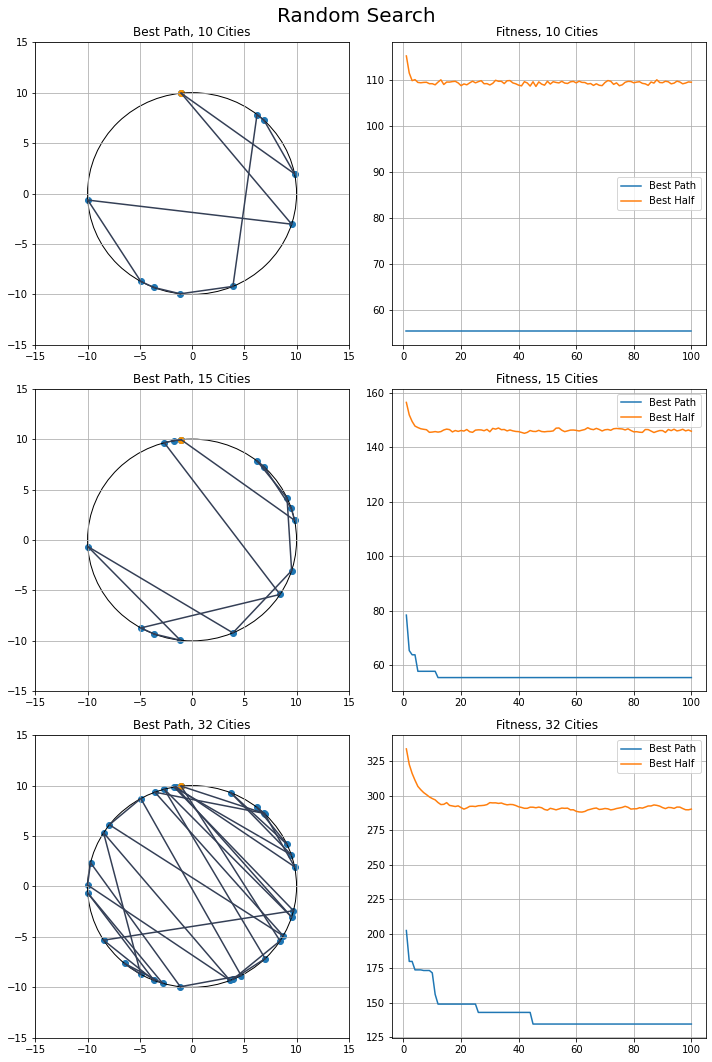

In [65]:
# Plot Random Search

# Load data :

city_file = "./data/randomsearch/circle_10/cities.dat"
bp_file = "./data/randomsearch/circle_10/best_path.dat"
avg_file = "./data/randomsearch/circle_10/avg_cost.dat"
lc_file = "./data/randomsearch/circle_10/least_cost.dat"

# City coordinates
x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
# Best paths of each generation and their cost
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)
# Average cost of top 50% of each generation
gen, avg_cost = np.loadtxt(avg_file, usecols=(0,1), unpack=True)


fig, ax = plt.subplots(3, 2, figsize=(10,15))
plt.suptitle("Random Search", fontsize=20)

ax[0,0] = tsp_on_circle(best_paths[99], x, y, 10, ax[0,0])
ax[0,0].title.set_text("Best Path, 10 Cities")
ax[0,1] = plot_cost(gen, least_cost, avg_cost, ax[0,1])
ax[0,1].title.set_text("Fitness, 10 Cities ")

city_file = "./data/randomsearch/circle_15/cities.dat"
bp_file = "./data/randomsearch/circle_15/best_path.dat"
avg_file = "./data/randomsearch/circle_15/avg_cost.dat"
lc_file = "./data/randomsearch/circle_15/least_cost.dat"

x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)
gen, avg_cost = np.loadtxt(avg_file, usecols=(0,1), unpack=True)

ax[1,0] = tsp_on_circle(best_paths[99], x, y, 10, ax[1,0])
ax[1,0].title.set_text("Best Path, 15 Cities")
ax[1,1] = plot_cost(gen, least_cost, avg_cost, ax[1,1])
ax[1,1].title.set_text("Fitness, 15 Cities ")

city_file = "./data/randomsearch/circle_32/cities.dat"
bp_file = "./data/randomsearch/circle_32/best_path.dat"
avg_file = "./data/randomsearch/circle_32/avg_cost.dat"
lc_file = "./data/randomsearch/circle_32/least_cost.dat"

x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)
gen, avg_cost = np.loadtxt(avg_file, usecols=(0,1), unpack=True)

ax[2,0] = tsp_on_circle(best_paths[99], x, y, 10, ax[2,0])
ax[2,0].title.set_text("Best Path, 32 Cities")
ax[2,1] = plot_cost(gen, least_cost, avg_cost, ax[2,1])
ax[2,1].title.set_text("Fitness, 32 Cities ")
plt.tight_layout()

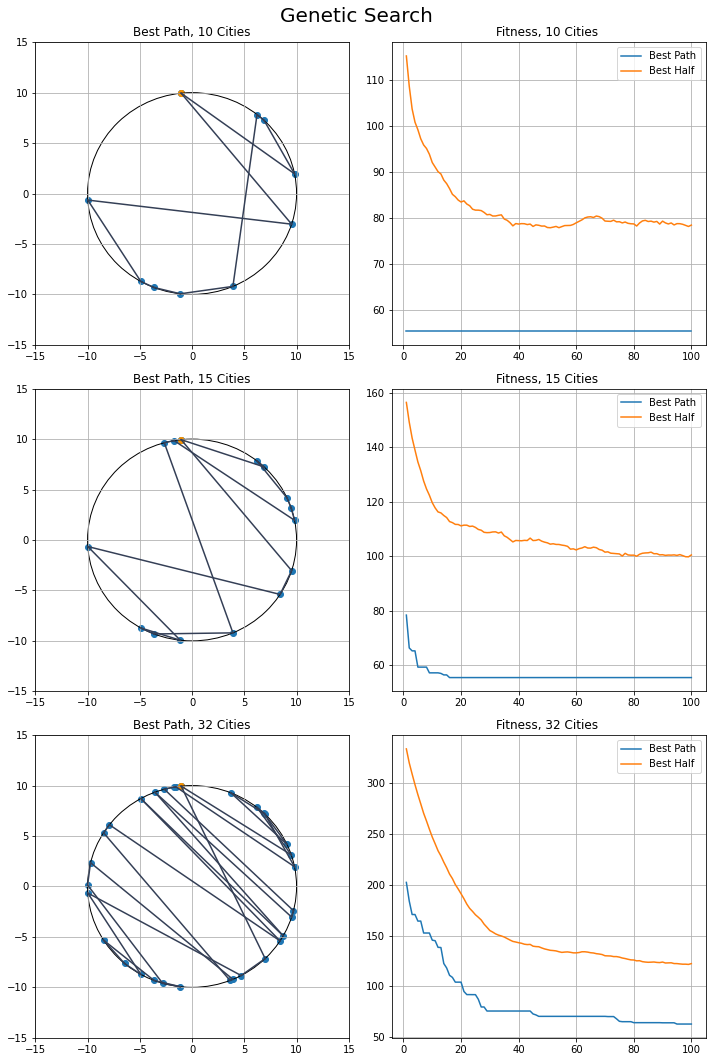

In [66]:
# Plot Genetic Search

fig, ax = plt.subplots(3, 2, figsize=(10,15))
plt.suptitle("Genetic Search", fontsize=20)

city_file = "./data/geneticsearch/circle_10/cities.dat"
bp_file = "./data/geneticsearch/circle_10/best_path.dat"
avg_file = "./data/geneticsearch/circle_10/avg_cost.dat"
lc_file = "./data/geneticsearch/circle_10/least_cost.dat"

x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)
gen, avg_cost = np.loadtxt(avg_file, usecols=(0,1), unpack=True)

ax[0,0] = tsp_on_circle(best_paths[99], x, y, 10, ax[0,0])
ax[0,0].title.set_text("Best Path, 10 Cities")
ax[0,1] = plot_cost(gen, least_cost, avg_cost, ax[0,1])
ax[0,1].title.set_text("Fitness, 10 Cities ")

city_file = "./data/geneticsearch/circle_15/cities.dat"
bp_file = "./data/geneticsearch/circle_15/best_path.dat"
avg_file = "./data/geneticsearch/circle_15/avg_cost.dat"
lc_file = "./data/geneticsearch/circle_15/least_cost.dat"

x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)
gen, avg_cost = np.loadtxt(avg_file, usecols=(0,1), unpack=True)

ax[1,0] = tsp_on_circle(best_paths[99], x, y, 10, ax[1,0])
ax[1,0].title.set_text("Best Path, 15 Cities")
ax[1,1] = plot_cost(gen, least_cost, avg_cost, ax[1,1])
ax[1,1].title.set_text("Fitness, 15 Cities ")

city_file = "./data/geneticsearch/circle_32/cities.dat"
bp_file = "./data/geneticsearch/circle_32/best_path.dat"
avg_file = "./data/geneticsearch/circle_32/avg_cost.dat"
lc_file = "./data/geneticsearch/circle_32/least_cost.dat"

x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)
gen, avg_cost = np.loadtxt(avg_file, usecols=(0,1), unpack=True)

ax[2,0] = tsp_on_circle(best_paths[99], x, y, 10, ax[2,0])
ax[2,0].title.set_text("Best Path, 32 Cities")
ax[2,1] = plot_cost(gen, least_cost, avg_cost, ax[2,1])
ax[2,1].title.set_text("Fitness, 32 Cities ")
plt.tight_layout()

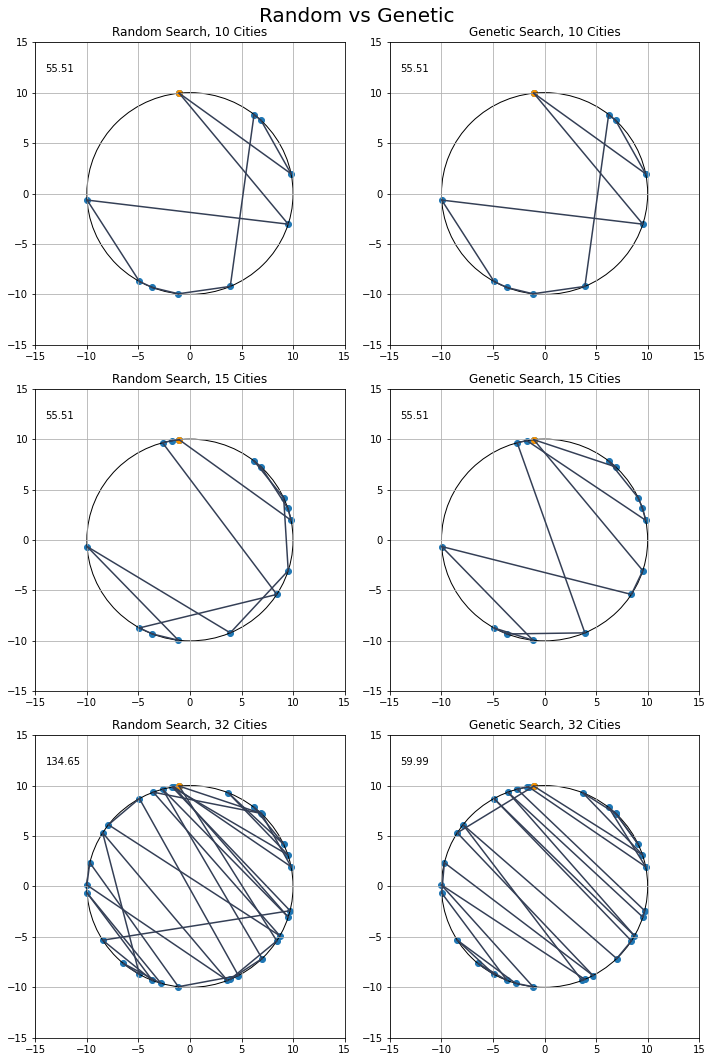

In [85]:
# Plot Genetic vs Random Search

fig, ax = plt.subplots(3, 2, figsize=(10,15))
plt.suptitle("Random vs Genetic", fontsize=20)

# 10 cities
city_file = "./data/randomsearch/circle_10/cities.dat"
bp_file = "./data/randomsearch/circle_10/best_path.dat"
lc_file = "./data/randomsearch/circle_10/least_cost.dat"
x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)

ax[0,0] = tsp_on_circle(best_paths[99], x, y, 10, ax[0,0])
ax[0,0].title.set_text("Random Search, 10 Cities")
ax[0,0].text(-14,12, str( round(least_cost[99], 2) ))
   
    
city_file = "./data/geneticsearch/circle_10/cities.dat"
bp_file = "./data/geneticsearch/circle_10/best_path.dat"
lc_file = "./data/geneticsearch/circle_10/least_cost.dat"
x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)

ax[0,1] = tsp_on_circle(best_paths[99], x, y, 10, ax[0,1])
ax[0,1].title.set_text("Genetic Search, 10 Cities")
ax[0,1].text(-14,12, str( round(least_cost[99], 2) ))

# 15 Cities
city_file = "./data/randomsearch/circle_15/cities.dat"
bp_file = "./data/randomsearch/circle_15/best_path.dat"
lc_file = "./data/randomsearch/circle_15/least_cost.dat"
x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)

ax[1,0] = tsp_on_circle(best_paths[99], x, y, 10, ax[1,0])
ax[1,0].title.set_text("Random Search, 15 Cities")
ax[1,0].text(-14,12, str( round(least_cost[99], 2) ))

city_file = "./data/geneticsearch/circle_15/cities.dat"
bp_file = "./data/geneticsearch/circle_15/best_path.dat"
lc_file = "./data/geneticsearch/circle_15/least_cost.dat"
x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)

ax[1,1] = tsp_on_circle(best_paths[99], x, y, 10, ax[1,1])
ax[1,1].title.set_text("Genetic Search, 15 Cities")
ax[1,1].text(-14,12, str( round(least_cost[99], 2) ))

# 32 Cities
city_file = "./data/randomsearch/circle_32/cities.dat"
bp_file = "./data/randomsearch/circle_32/best_path.dat"
lc_file = "./data/randomsearch/circle_32/least_cost.dat"
x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)

ax[2,0] = tsp_on_circle(best_paths[99], x, y, 10, ax[2,0])
ax[2,0].title.set_text("Random Search, 32 Cities")
ax[2,0].text(-14,12, str( round(least_cost[99], 2) ))


city_file = "./data/geneticsearch/circle_32_200/cities.dat"
bp_file = "./data/geneticsearch/circle_32_200/best_path.dat"
lc_file = "./data/geneticsearch/circle_32_200/least_cost.dat"
x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)

ax[2,1] = tsp_on_circle(best_paths[199], x, y, 10, ax[2,1])
ax[2,1].title.set_text("Genetic Search, 32 Cities")
ax[2,1].text(-14,12, str( round(least_cost[199], 2) ))

plt.tight_layout()

### Part 2 - The Traveling Salesman in a Square

In [4]:
def tsp_in_square(path, x, y, side, ax=None, draw=True):
    
    if ax is None:
        ax = plt.gca() 
        
    if (draw==True): # Draw the circle
        square = plt.Rectangle((-side,-side), 2*side, 2*side, lw=2, color='#2940d3')
        square.set_fill(False)
        ax.add_patch(square)
        
    # Plot cities
    ax.scatter(x,y)
    ax.scatter(x[0],y[0], color="#fb9300") # Starting city
    
    # Grid and limits
    ax.grid(True)
    lim = side*1.5
    ax.set_xlim([-lim,lim])
    ax.set_ylim([-lim,lim])
    
    # Plot each leg of the TSP
    N = np.size(path)
    for i in range(N):
        if (i==N-1):
            a = int(path[i])
            b = int(path[0])
        else:
            a = int(path[i])
            b = int(path[i+1])
        p1 = [x[a], y[a]]
        p2 = [x[b], y[b]]
        draw_path(p1, p2, ax)
        
    return ax

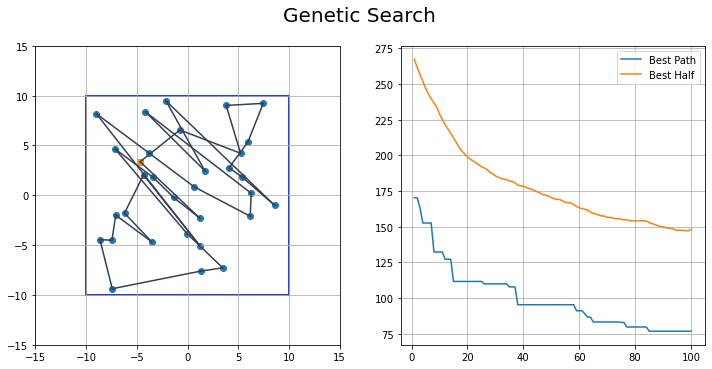

In [112]:
# Genetic Algorithm in Square

city_file = "./data/geneticsearch/square_32/cities.dat"
bp_file = "./data/geneticsearch/square_32/best_path.dat"
avg_file = "./data/geneticsearch/square_32/avg_cost.dat"
lc_file = "./data/geneticsearch/square_32/least_cost.dat"

x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)
gen, avg_cost = np.loadtxt(avg_file, usecols=(0,1), unpack=True)

fig, ax = plt.subplots(1, 2, figsize=(12,5.5))
plt.suptitle("Genetic Search", fontsize=20)
ax[0] = tsp_in_square(best_paths[99], x, y, 10.0, ax[0])
ax[1] = plot_cost(gen, least_cost, avg_cost, ax[1])

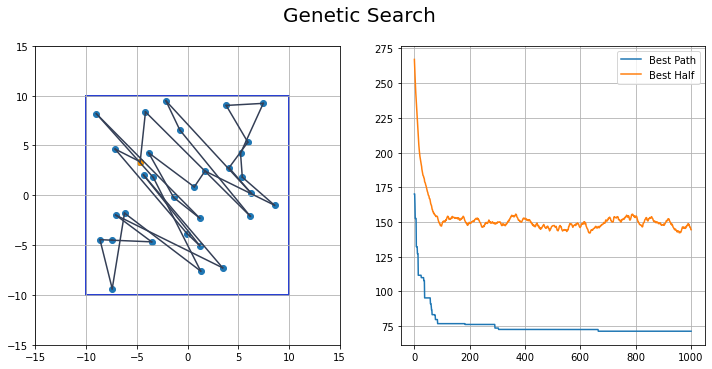

In [116]:
# Another run
city_file = "./data/geneticsearch/square_32_1000/cities.dat"
bp_file = "./data/geneticsearch/square_32_1000/best_path.dat"
avg_file = "./data/geneticsearch/square_32_1000/avg_cost.dat"
lc_file = "./data/geneticsearch/square_32_1000/least_cost.dat"

x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)
gen, avg_cost = np.loadtxt(avg_file, usecols=(0,1), unpack=True)

fig, ax = plt.subplots(1, 2, figsize=(12,5.5))
plt.suptitle("Genetic Search", fontsize=20)
ax[0] = tsp_in_square(best_paths[199], x, y, 10.0, ax[0])
ax[1] = plot_cost(gen, least_cost, avg_cost, ax[1])

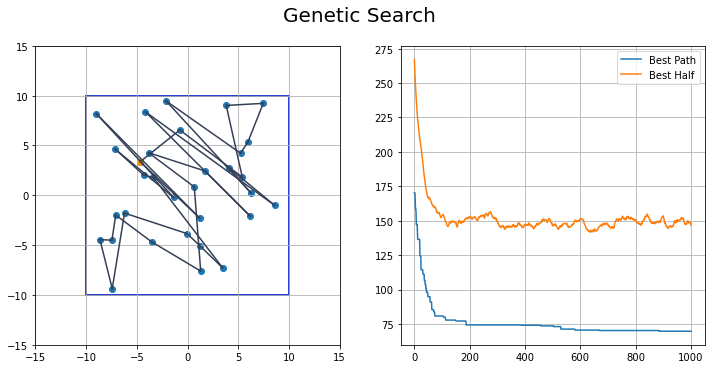

In [117]:
# Yet Another run


city_file = "./data/geneticsearch/square_32_1000_b/cities.dat"
bp_file = "./data/geneticsearch/square_32_1000_b/best_path.dat"
avg_file = "./data/geneticsearch/square_32_1000_b/avg_cost.dat"
lc_file = "./data/geneticsearch/square_32_1000_b/least_cost.dat"

x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)
gen, avg_cost = np.loadtxt(avg_file, usecols=(0,1), unpack=True)

fig, ax = plt.subplots(1, 2, figsize=(12,5.5))
plt.suptitle("Genetic Search", fontsize=20)
ax[0] = tsp_in_square(best_paths[199], x, y, 10.0, ax[0])
ax[1] = plot_cost(gen, least_cost, avg_cost, ax[1])

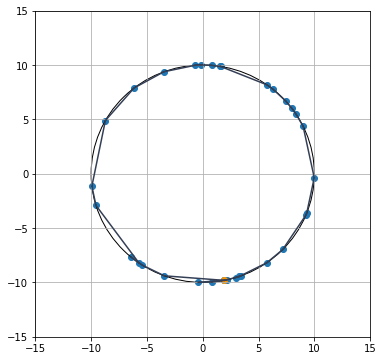

In [125]:
datafile = "./cities.dat"
x, y = np.loadtxt(datafile, usecols=(0, 1), unpack=True)
datafile = "./best_path.dat"
best_paths = np.loadtxt(datafile)
datafile = "./avg_cost.dat"
gen, avg_cost = np.loadtxt(datafile, usecols=(0,1), unpack=True)
datafile = "./least_cost.dat"
least_cost = np.loadtxt(datafile)

fig, ax = plt.subplots(figsize=(6,6))
tsp_on_circle(best_paths[99], x, y, 10, ax)
plt.show()

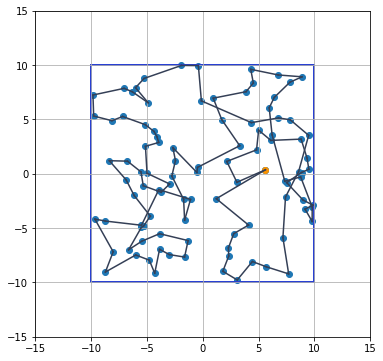

In [5]:
datafile = "./cities.dat"
x, y = np.loadtxt(datafile, usecols=(0, 1), unpack=True)
datafile = "./best_path.dat"
best_paths = np.loadtxt(datafile)
datafile = "./avg_cost.dat"
gen, avg_cost = np.loadtxt(datafile, usecols=(0,1), unpack=True)
datafile = "./least_cost.dat"
least_cost = np.loadtxt(datafile)

fig, ax = plt.subplots(figsize=(6,6))
tsp_in_square(best_paths[999], x, y, 10, ax)
plt.show()

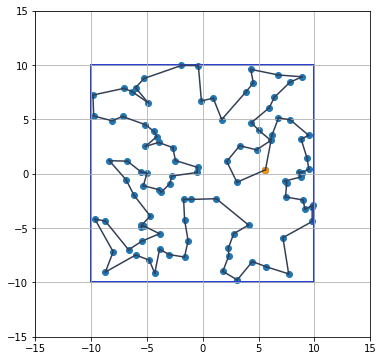

(200.0, 400.0)

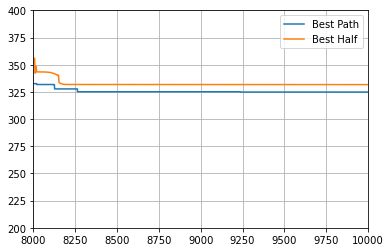

In [7]:
datafile = "./best_path.dat"
best_paths = np.loadtxt(datafile, skiprows=(9900))

datafile = "./cities.dat"
x, y = np.loadtxt(datafile, usecols=(0, 1), unpack=True)

datafile = "./avg_cost.dat"
gen, avg_cost = np.loadtxt(datafile, usecols=(0,1), unpack=True)
datafile = "./least_cost.dat"
least_cost = np.loadtxt(datafile)

fig, ax = plt.subplots(figsize=(6,6))
tsp_in_square(best_paths[99], x, y, 10, ax)
plt.show()

ax = plot_cost(gen, least_cost, avg_cost)
ax.set_xlim([8000,10000])
ax.set_ylim([200,400])
